
# Treinamento de Modelos de Regressão Linear

Neste documento, vamos abordar dois métodos de treinamento de modelos de regressão linear: o Gradiente Descendente e a Solução Analítica, bem como o uso de DataFrames para manipular dados de entrada.

## Gradiente Descendente

O Gradiente Descendente é uma técnica de otimização usada para treinar modelos de regressão linear.

\begin{align*}
\text{Repetir até convergência:} \\
\theta_j & := \theta_j -  \frac{1}{m} \alpha \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \quad \text{para } j = 0 \\
\theta_j & := \theta_j - \frac{1}{m} \alpha \left(\sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}\right) \quad \text{para } j \neq 0
\end{align*}


## Solução Analítica

A Solução Analítica, também conhecida como Mínimos Quadrados, é uma abordagem direta para encontrar os valores ótimos dos parâmetros do modelo de regressão linear. 

$$
\theta = \frac{2}{m}(X^T X)^{-1} X^T y
$$



In [1278]:
from sklearn.base import BaseEstimator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import zipfile
import io
import requests
from sklearn.metrics import mean_squared_error

# Função h 
A função h calcula a hipótese de regressão linear usando o vetor de coeficientes 'theta' e os recursos 'x[i]'.

In [1279]:
def h(x, i, theta):
    h = 0
    for j in range(len(theta)):
        h += x[i][j] * theta[j]
    return h

# Explicação do Código Gradiente Descendente

## Variáveis Iniciais

- `eixo_X` e `eixo_Y`: São listas vazias que serão usadas para armazenar informações sobre a iteração do algoritmo e plotar um gráfico. `eixo_X` conterá o número da iteração correspondente, enquanto `eixo_Y` conterá os valores de custo calculados em cada iteração.

## Função `gradiente_descendente`

A função `gradiente_descendente` é o núcleo do algoritmo Gradiente Descendente. Ela recebe os seguintes parâmetros:

- `x`: Conjunto de dados de entrada.
- `y`: Vetor de valores alvo.
- `theta`: Vetor de coeficientes a serem ajustados pelo algoritmo.
- `ALFA`: Taxa de aprendizado (learning rate).
- `ITE`: Número máximo de iterações do algoritmo.

O algoritmo tem o objetivo de ajustar os coeficientes `theta` de modo que a função de custo seja minimizada.

O algoritmo é iterativo e segue os seguintes passos:

1. Inicialização de variáveis, incluindo o número de exemplos de treinamento (`m`) e o número de coeficientes `theta` (`n`).

2. O loop principal é executado até que o número máximo de iterações (`ITE`) seja atingido.

3. Dentro do loop principal:
   - Calcula a hipótese (`hip`) para cada exemplo de treinamento usando a função `h`.
   - Calcula o custo entre a hipótese e o valor real (`custo`).
   - Atualiza os valores de custo e armazena a diferença absoluta em `eixo_X`.
   - Atualiza os coeficientes `theta` usando o Gradiente Descendente.

4. O número da iteração é incrementado (`ite`).

5. O algoritmo continua a iterar até que o critério de parada (`ITE`) seja atingido.

## Conclusão

Este código implementa o algoritmo Gradiente Descendente para ajustar os coeficientes de um modelo de regressão linear. O algoritmo é usado para minimizar o custo e encontrar os valores ótimos de `theta` para fazer previsões precisas com base nos dados de treinamento.


In [1280]:
eixo_X = []
eixo_Y = []

def gradiente_descendente(x,y,theta,ALFA,ITE):
    m = len(x)              # Número de exemplos de treinamento
    n = len(theta)          # Número de coeficientes theta
    ite = 0
    while ite < ITE:        # Critério de parada: diferença máxima entre os valores antigos e novos de theta
        eixo_Y.append(ite)
        custo = 0
        for i in range(m):    # Loop sobre os exemplos de treinamento
            hip = h(x, i, theta)    # Calcula a hipótese para o exemplo i
            custo = hip - y[i]
            for j in range(n):
                custo *= x[i][j]
        custo *= 1/m
        eixo_X.append(abs(custo))
        for j in range(n):
            theta[j] = theta[j] - ALFA * custo

        ite += 1

# Explicação da Função Solução Analítica

## Parâmetros da Função

- `x`: Conjunto de dados de entrada.
- `y`: Vetor de valores alvo.
- `theta`: Vetor de coeficientes a serem estimados.

## Implementação da Solução Analítica

A função `solucao_analitica` calcula os valores ótimos dos coeficientes `theta` usando a fórmula da Solução Analítica para a regressão linear. Aqui está a implementação passo a passo:

1. Calcula o número de exemplos de treinamento (`m`).

2. Converte o conjunto de dados `x` em um array NumPy para facilitar o cálculo.

3. Calcula a matriz transposta de `x` e armazena-a em `xt`.

4. Calcula os valores ótimos dos coeficientes `theta` usando a fórmula da Solução Analítica.

   - `\theta`: Vetor de coeficientes ótimos.
   - `m`: Número de exemplos de treinamento.
   - `xt`: Matriz transposta de `x`.
   - `x`: Conjunto de dados de entrada.
   - `y`: Vetor de valores alvo.

5. Os valores ótimos dos coeficientes `theta` são calculados e armazenados no próprio vetor `theta`.




In [1281]:
def solucao_analitica(x,y,theta):
    m = len(y)
    x = np.array(x)
    xt =  x.transpose()

    theta[:] = (2/m) * np.linalg.pinv(xt @ x) @ xt @ y

# Explicação do Código LMSTrainer

### Construtor `__init__`

O construtor `__init__` aceita três parâmetros opcionais: `analitic`, `ALFA` e `ITE`. Esses parâmetros são usados para configurar o comportamento da classe durante o treinamento.

- `analitic`: Um parâmetro booleano que indica se a solução analítica (método dos mínimos quadrados) deve ser usada. Se for True, a solução analítica será usada; caso contrário, o gradiente descendente será usado.

- `ALFA`: A taxa de aprendizado (learning rate) a ser usada no gradiente descendente.

- `ITE`: O número de iterações a serem executadas no gradiente descendente.

### Método `fit`

O método `fit` é usado para treinar o modelo de regressão linear. Se `self.analitic` for True, ele chama a função `solucao_analitica`, caso contrário, chama a função `gradiente_descendente`. Após o treinamento, ele define o atributo `_trained` como True para indicar que o modelo foi treinado e retorna a própria instância da classe.

### Método `predict`

O método `predict` é usado para fazer previsões com o modelo treinado. Ele verifica se o modelo foi treinado (`self._trained`) e, em seguida, realiza as previsões com base nos dados de entrada `X` e nos parâmetros `theta`. As previsões são arredondadas para duas casas decimais e comparadas com o gabarito (`y`). Os resultados são impressos no console.

In [1282]:
class LMSTrainer(BaseEstimator):

    def __init__(self, analitic= None, ALFA = None, ITE = None):

        self.analitic = analitic
        self._trained = False
        self.ALFA = ALFA
        self.ITE = ITE
    def fit(self, X, theta,y=None):
        if self.analitic:
            solucao_analitica(X,y,theta)

        else:
            gradiente_descendente(X,y,theta,self.ALFA,self.ITE)

        self._trained = True

        return self

    def predict(self, X, theta, y=None):

        if not self._trained:
            raise RuntimeError("You must train classifer before predicting data!")

        teste = [0] * len(y)
        gab = [0] * len(y)
        for i in range(len(y)):
            teste[i] = round(h(X, i, theta), 2)
            gab[i] = y[i]


        print("Teste:")
        print(teste)
        print("Gabarito:")
        print(gab)
        
        return teste

# DATASET

## Informações do Conjunto de Dados

Os conjuntos de dados contêm informações sobre características físico-químicas e a qualidade sensorial dos vinhos. Aqui estão algumas informações adicionais sobre esses conjuntos de dados:

Variáveis de Entrada:
   1 - Acidez Fixa (fixed acidity)
   2 - Acidez Volátil (volatile acidity)
   3 - Ácido Cítrico (citric acid)
   4 - Açúcar Residual (residual sugar)
   5 - Cloretos (chlorides)
   6 - Dióxido de Enxofre Livre (free sulfur dioxide)
   7 - Dióxido de Enxofre Total (total sulfur dioxide)
   8 - Densidade (density)
   9 - pH (pH)
   10 - Sulfatos (sulphates)
   11 - Teor Alcoólico (alcohol)

Variável de Saída:
   12 - Qualidade (score entre 0 e 10)

A variável de saída, 'Qualidade', é o alvo (target) deste conjunto de dados.


## Código para Download e Manipulação de Dados

- `url`: Esta variável armazena a URL do arquivo ZIP que contém o conjunto de dados relacionado aos vinhos "Vinho Verde" de Portugal.

- O código utiliza a biblioteca `requests` para fazer o download do arquivo ZIP da URL especificada.

## Adição da Coluna de 1s no DataFrame

No código apresentado, a linha `df.insert(0, '1', 1)` é responsável por adicionar uma nova coluna ao DataFrame `df`. 

- `df`: Este é o DataFrame que contém os dados relacionados aos vinhos.

- `insert(0, '1', 1)`: Esta função `insert` é chamada no DataFrame `df` e possui três argumentos:
   - `0`: O primeiro argumento é o índice onde a nova coluna será inserida. Neste caso, é o índice 0, o que significa que a nova coluna será adicionada no início do DataFrame.
   - `'1'`: O segundo argumento é o nome da nova coluna. Ela é nomeada como '1'.
   - `1`: O terceiro argumento é o valor que será preenchido em todas as células da nova coluna. Neste caso, todas as células terão o valor 1.

A coluna de 1s é adicionada ao DataFrame para garantir que o modelo de regressão linear seja alinhado corretamente com o coeficiente theta0.
O theta_0 é coeficiente de interceptação, é um coeficiente linear no contexto de regressão linear.

$$ y = \theta_0 \cdot x_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2 + \ldots + \theta_n \cdot x_n $$


In [1283]:
# URL direto para o arquivo ZIP
url = "https://archive.ics.uci.edu/static/public/186/wine+quality.zip"

# Baixar o arquivo ZIP
response = requests.get(url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))

# Escolher o arquivo CSV a ser lido (por exemplo, 'winequality-red.csv')
file_to_read = 'winequality-red.csv'

# Ler o arquivo CSV dentro do ZIP
df = pd.read_csv(zip_file.open(file_to_read),sep=";")


df['target_column'] = df['quality']  # Renomeando a coluna alvo
df = df.drop('quality', axis=1)      # Remocendo a coluna antiga

df.insert(0, '1', 1)

## Preparação dos Dados e Treinamento do Modelo

Nesta seção do código, são realizadas etapas importantes para preparar os dados e treinar um modelo usando o conjunto de dados dos vinhos. Vamos explicar cada parte:

- `X = df.drop('target_column', axis=1)`: Aqui, o DataFrame `df` é usado para criar uma variável `X`, que contém todas as colunas de características (variáveis de entrada) excluindo a coluna alvo, que é chamada de 'target_column'. Portanto, `X` contém todas as características que serão usadas para fazer previsões.

- `Y = df['target_column']`: Esta linha cria uma variável `Y` que contém a coluna alvo 'target_column', que representa a qualidade dos vinhos. É essa coluna que o modelo tentará prever.

- `num_columns = X.shape[1]`: Aqui, é calculado o número de colunas em `X`, que corresponde ao número de características. Isso é importante para a inicialização dos coeficientes do modelo.

- `X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.9, random_state=42)`: Nesta linha, os dados são divididos em conjuntos de treinamento (`X_train` e `y_train`) e conjuntos de teste (`X_test` e `y_test`) usando a função `train_test_split`. O conjunto de teste representa uma porção substancial dos dados (20%), enquanto o conjunto de treinamento é usado para treinar o modelo.

- `ALFA = 0.000001` e `ITE = 1000000`: Essas duas linhas definem a taxa de aprendizado (`ALFA`) e o número máximo de iterações (`ITE`) que serão usados no algoritmo de treinamento. A taxa de aprendizado controla o tamanho dos passos que o algoritmo dá durante o treinamento.

- `trainer = LMSTrainer(False,ALFA,ITE)`: Aqui, uma instância do objeto `LMSTrainer` é criada para treinar o modelo. O argumento `False` indica que o treinamento não será feito usando a solução analítica, mas sim usando o algoritmo de gradiente descendente.

- `theta = [0] * num_columns`: Uma lista `theta` é criada, com todos os elementos inicializados com 0. Essa lista representa os coeficientes do modelo que serão ajustados durante o treinamento.

- `predictor = trainer.fit(X_train.values, theta, y_train.values)`: O modelo é treinado chamando o método `fit` do objeto `trainer`. Os conjuntos de treinamento `X_train` e `y_train` são passados, juntamente com os coeficientes iniciais `theta`.

- `predictor.predict(X_test.values, theta, y_test.values)`: Após o treinamento, o modelo é usado para fazer previsões nos dados de teste. O método `predict` é chamado, passando `X_test` e `y_test`, juntamente com `theta`.


TREINO

Teste:
[7.04, 20.53, 9.72, 7.02, 8.44, 18.61, 13.96, 21.05, 13.39, 9.07, 6.75, 12.86, 31.25, 10.37, 20.75, 8.85, 9.75, 6.48, 12.35, 12.23, 10.51, 16.83, 14.05, 8.94, 16.3, 7.01, 11.3, 6.87, 15.6, 8.47, 9.4, 9.53, 9.71, 12.23, 7.68, 8.44, 16.33, 6.01, 21.64, 7.1, 6.96, 13.77, 24.13, 7.19, 19.14, 10.13, 6.87, 12.99, 17.83, 7.19, 7.69, 13.47, 18.63, 12.47, 8.22, 6.72, 18.26, 11.27, 8.55, 52.15, 6.01, 19.58, 9.93, 7.8, 12.05, 7.93, 8.74, 14.65, 17.42, 11.03, 9.29, 23.45, 21.73, 17.91, 6.88, 10.28, 12.62, 10.18, 5.78, 18.62, 14.08, 10.91, 17.85, 8.82, 10.04, 6.34, 23.52, 19.23, 18.58, 8.15, 27.79, 11.91, 8.42, 6.75, 18.55, 7.73, 10.92, 13.85, 16.93, 9.18, 13.84, 13.69, 6.67, 10.08, 11.27, 16.91, 16.12, 14.31, 31.1, 7.58, 11.06, 11.41, 27.65, 10.78, 8.95, 6.66, 9.78, 7.09, 20.68, 8.01, 15.24, 18.93, 9.38, 27.14, 7.16, 17.99, 15.67, 7.07, 12.68, 9.71, 14.24, 6.24, 9.57, 16.23, 7.7, 8.37, 25.28, 18.54, 14.61, 27.17, 19.34, 9.13, 11.44, 7.4, 11.2, 10.06, 12.59, 19.35, 7.07, 15.66, 7.18,

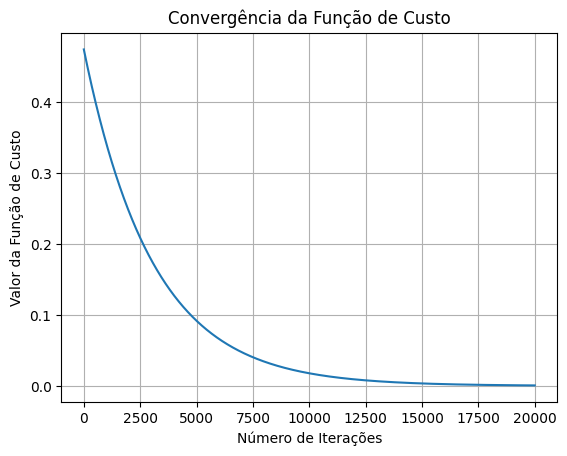

In [1284]:
X = df.drop('target_column', axis=1)
Y = df['target_column']
num_columns = X.shape[1] 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.70, random_state=42)
ALFA = 0.0001
ITE = 20000
trainer = LMSTrainer(False,ALFA,ITE)
theta = [0] * num_columns

predictor = trainer.fit(X_train.values, theta, y_train.values)
# teste = predictor.predict(X_test.values, theta, y_test.values)

print("TREINO\n")
previsoes_treinamento = trainer.predict(X_train.values, theta, y_train.values)
print("TESTE\n")
previsoes_teste = trainer.predict(X_test.values, theta, y_test.values)

# Calcular o erro médio quadrático (MSE) para os dados de treinamento e teste

mse_treinamento = mean_squared_error(y_train, previsoes_treinamento)

mse_teste = mean_squared_error(y_test, previsoes_teste)

print("Erro Médio Quadrático (MSE) - Treinamento:", mse_treinamento)
print("Erro Médio Quadrático (MSE) - Teste:", mse_teste)


plt.figure()
plt.plot(eixo_Y, eixo_X, linestyle='-')
plt.title('Convergência da Função de Custo')
plt.xlabel('Número de Iterações')
plt.ylabel('Valor da Função de Custo')
plt.grid(True)
plt.show()

# Observações

Durante meu experimento de aprendizado de máquina, enfrentei os seguintes desafios:

**Número de Iterações:** Tive dificuldade em encontrar o número certo de iterações para treinar meu modelo. Um número muito baixo resultava em resultados ruins, enquanto um número muito alto aumentava significativamente o tempo de execução.

**Taxa de Aprendizado:** Ajustar a taxa de aprendizado também foi complicado. Uma taxa alta causava problemas, enquanto uma taxa baixa exigia muitas iterações para convergir, o que tornava o processo demorado.

Consequentemente, a taxa de erro permaneceu alta devido à necessidade de encontrar um equilíbrio entre uma taxa de aprendizado baixa e um número suficiente de iterações para obter resultados aceitáveis. Essas dificuldades destacaram a importância de ajustar cuidadosamente os hiperparâmetros durante o treinamento do modelo.
